In [1]:
import phoebe 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

logger = phoebe.logger(clevel = 'WARNING')

In [2]:
b = phoebe.open('/Users/karan/Documents/GitHub/Eclipsing-Binary-Modeling/bundles/after_de_rv.bundle')

In [3]:
pblums_scaled = b.compute_pblums(compute='physics_comp', model='nm_lc_model')

print(pblums_scaled)

{'pblum@primary@rv01': <Quantity 1.34724848e+26 W>, 'pblum@secondary@rv01': <Quantity 2.03849958e+26 W>, 'pblum@primary@lc01': <Quantity 3.98312208 W>, 'pblum@secondary@lc01': <Quantity 6.46838291 W>}


In [4]:
b.set_value_all('pblum_mode', 'component-coupled')

In [5]:
b.set_value('pblum@primary@lc01', value = pblums_scaled['pblum@primary@lc01'])

print(b.compute_pblums(compute='physics_comp', dataset='lc01', pbflux=True))

{'pblum@primary@lc01': <Quantity 3.98312208 W>, 'pblum@secondary@lc01': <Quantity 6.46838291 W>, 'pbflux@lc01': <Quantity 0.83170434 W / m2>}


In [6]:
print(b['t0_supconj'])
print(b['t0@system'])
b['t0@system'] = b.get_value('t0_supconj')

Parameter: t0_supconj@binary@component
                       Qualifier: t0_supconj
                     Description: Zeropoint date at superior conjunction of the primary component
                           Value: 55749.81179087607 d
                  Constrained by: 
                      Constrains: t0_perpass@binary@component, t0_ref@binary@component, compute_times@lc01@dataset, compute_times@rv01@dataset
                      Related to: period@binary@component, ecc@binary@component, per0@binary@component, dpdt@binary@component, dperdt@binary@component, t0@system, t0_perpass@binary@component, t0_ref@binary@component, compute_phases@lc01@dataset, phases_period@lc01@dataset, period_anom@binary@component, phases_dpdt@lc01@dataset, phases_t0@lc01@dataset, compute_times@lc01@dataset, compute_phases@rv01@dataset, phases_period@rv01@dataset, phases_dpdt@rv01@dataset, phases_t0@rv01@dataset, compute_times@rv01@dataset

Parameter: t0@system
                       Qualifier: t0
           

In [7]:
b.flip_constraint('esinw', solve_for='ecc')
b.flip_constraint('ecosw', solve_for='per0')

<ConstraintParameter: {per0@binary@component} = ecosw2per0({ecc@binary@component}, {ecosw@binary@component}) (solar units) => 85.6494280626582 deg>

In [8]:
b.flip_constraint('compute_times@rv01', solve_for='compute_phases')

<ConstraintParameter: {compute_phases@rv01@dataset} = times_to_phases({compute_times@rv01@dataset}, {phases_period@rv01@dataset}, {period@binary@component}, {period_anom@binary@component}, {phases_dpdt@rv01@dataset}, {dpdt@binary@component}, {phases_t0@rv01@dataset}, {t0_supconj@binary@component}, {t0_perpass@binary@component}, {t0_ref@binary@component}) (solar units) => [ 0.00000000e+00  1.66666667e-02  3.33333333e-02  5.00000000e-02
  6.66666667e-02  8.33333333e-02  1.00000000e-01  1.16666667e-01
  1.33333333e-01  1.50000000e-01  1.66666667e-01  1.83333333e-01
  2.00000000e-01  2.16666667e-01  2.33333333e-01  2.50000000e-01
  2.66666667e-01  2.83333333e-01  3.00000000e-01  3.16666667e-01
  3.33333333e-01  3.50000000e-01  3.66666667e-01  3.83333333e-01
  4.00000000e-01  4.16666667e-01  4.33333333e-01  4.50000000e-01
  4.66666667e-01  4.83333333e-01 -5.00000000e-01 -4.83333333e-01
 -4.66666667e-01 -4.50000000e-01 -4.33333333e-01 -4.16666667e-01
 -4.00000000e-01 -3.83333333e-01 -3.66666

In [9]:
rv_times = b.get_value('times@secondary@rv01@dataset')

print(rv_times)

[55763.657622 55797.798841 55801.772678 55840.667652 55844.647447
 55860.612849 55811.613101 55840.593371 55851.578556]


In [10]:
b.set_value('compute_times@rv01', value = phoebe.linspace(rv_times[0], rv_times[-1], 501))

In [11]:
b.set_value('l3_mode', 'fraction')

In [12]:
b.add_distribution({'teffratio': phoebe.gaussian_around(0.02), 
                    'requivsumfrac': phoebe.gaussian_around(0.01), 
                    'requivratio': phoebe.gaussian_around(0.01), 
                    'incl@binary': phoebe.uniform_around(0.05), 
                    'pblum@primary': phoebe.gaussian_around(0.01)}, distribution = 'init_sample')

b.add_distribution({'vgamma@system': phoebe.gaussian_around(0.5), 
                    'q': phoebe.gaussian_around(0.02), 
                    'asini@binary': phoebe.gaussian_around(0.1), 
                    'esinw': phoebe.uniform_around(0.01),
                    'ecosw': phoebe.uniform_around(0.01),}, distribution = 'init_sample')
 
b.add_distribution('l3_frac', phoebe.uniform(0, 0.01), distribution = 'init_sample')

<ParameterSet: 1 parameters>

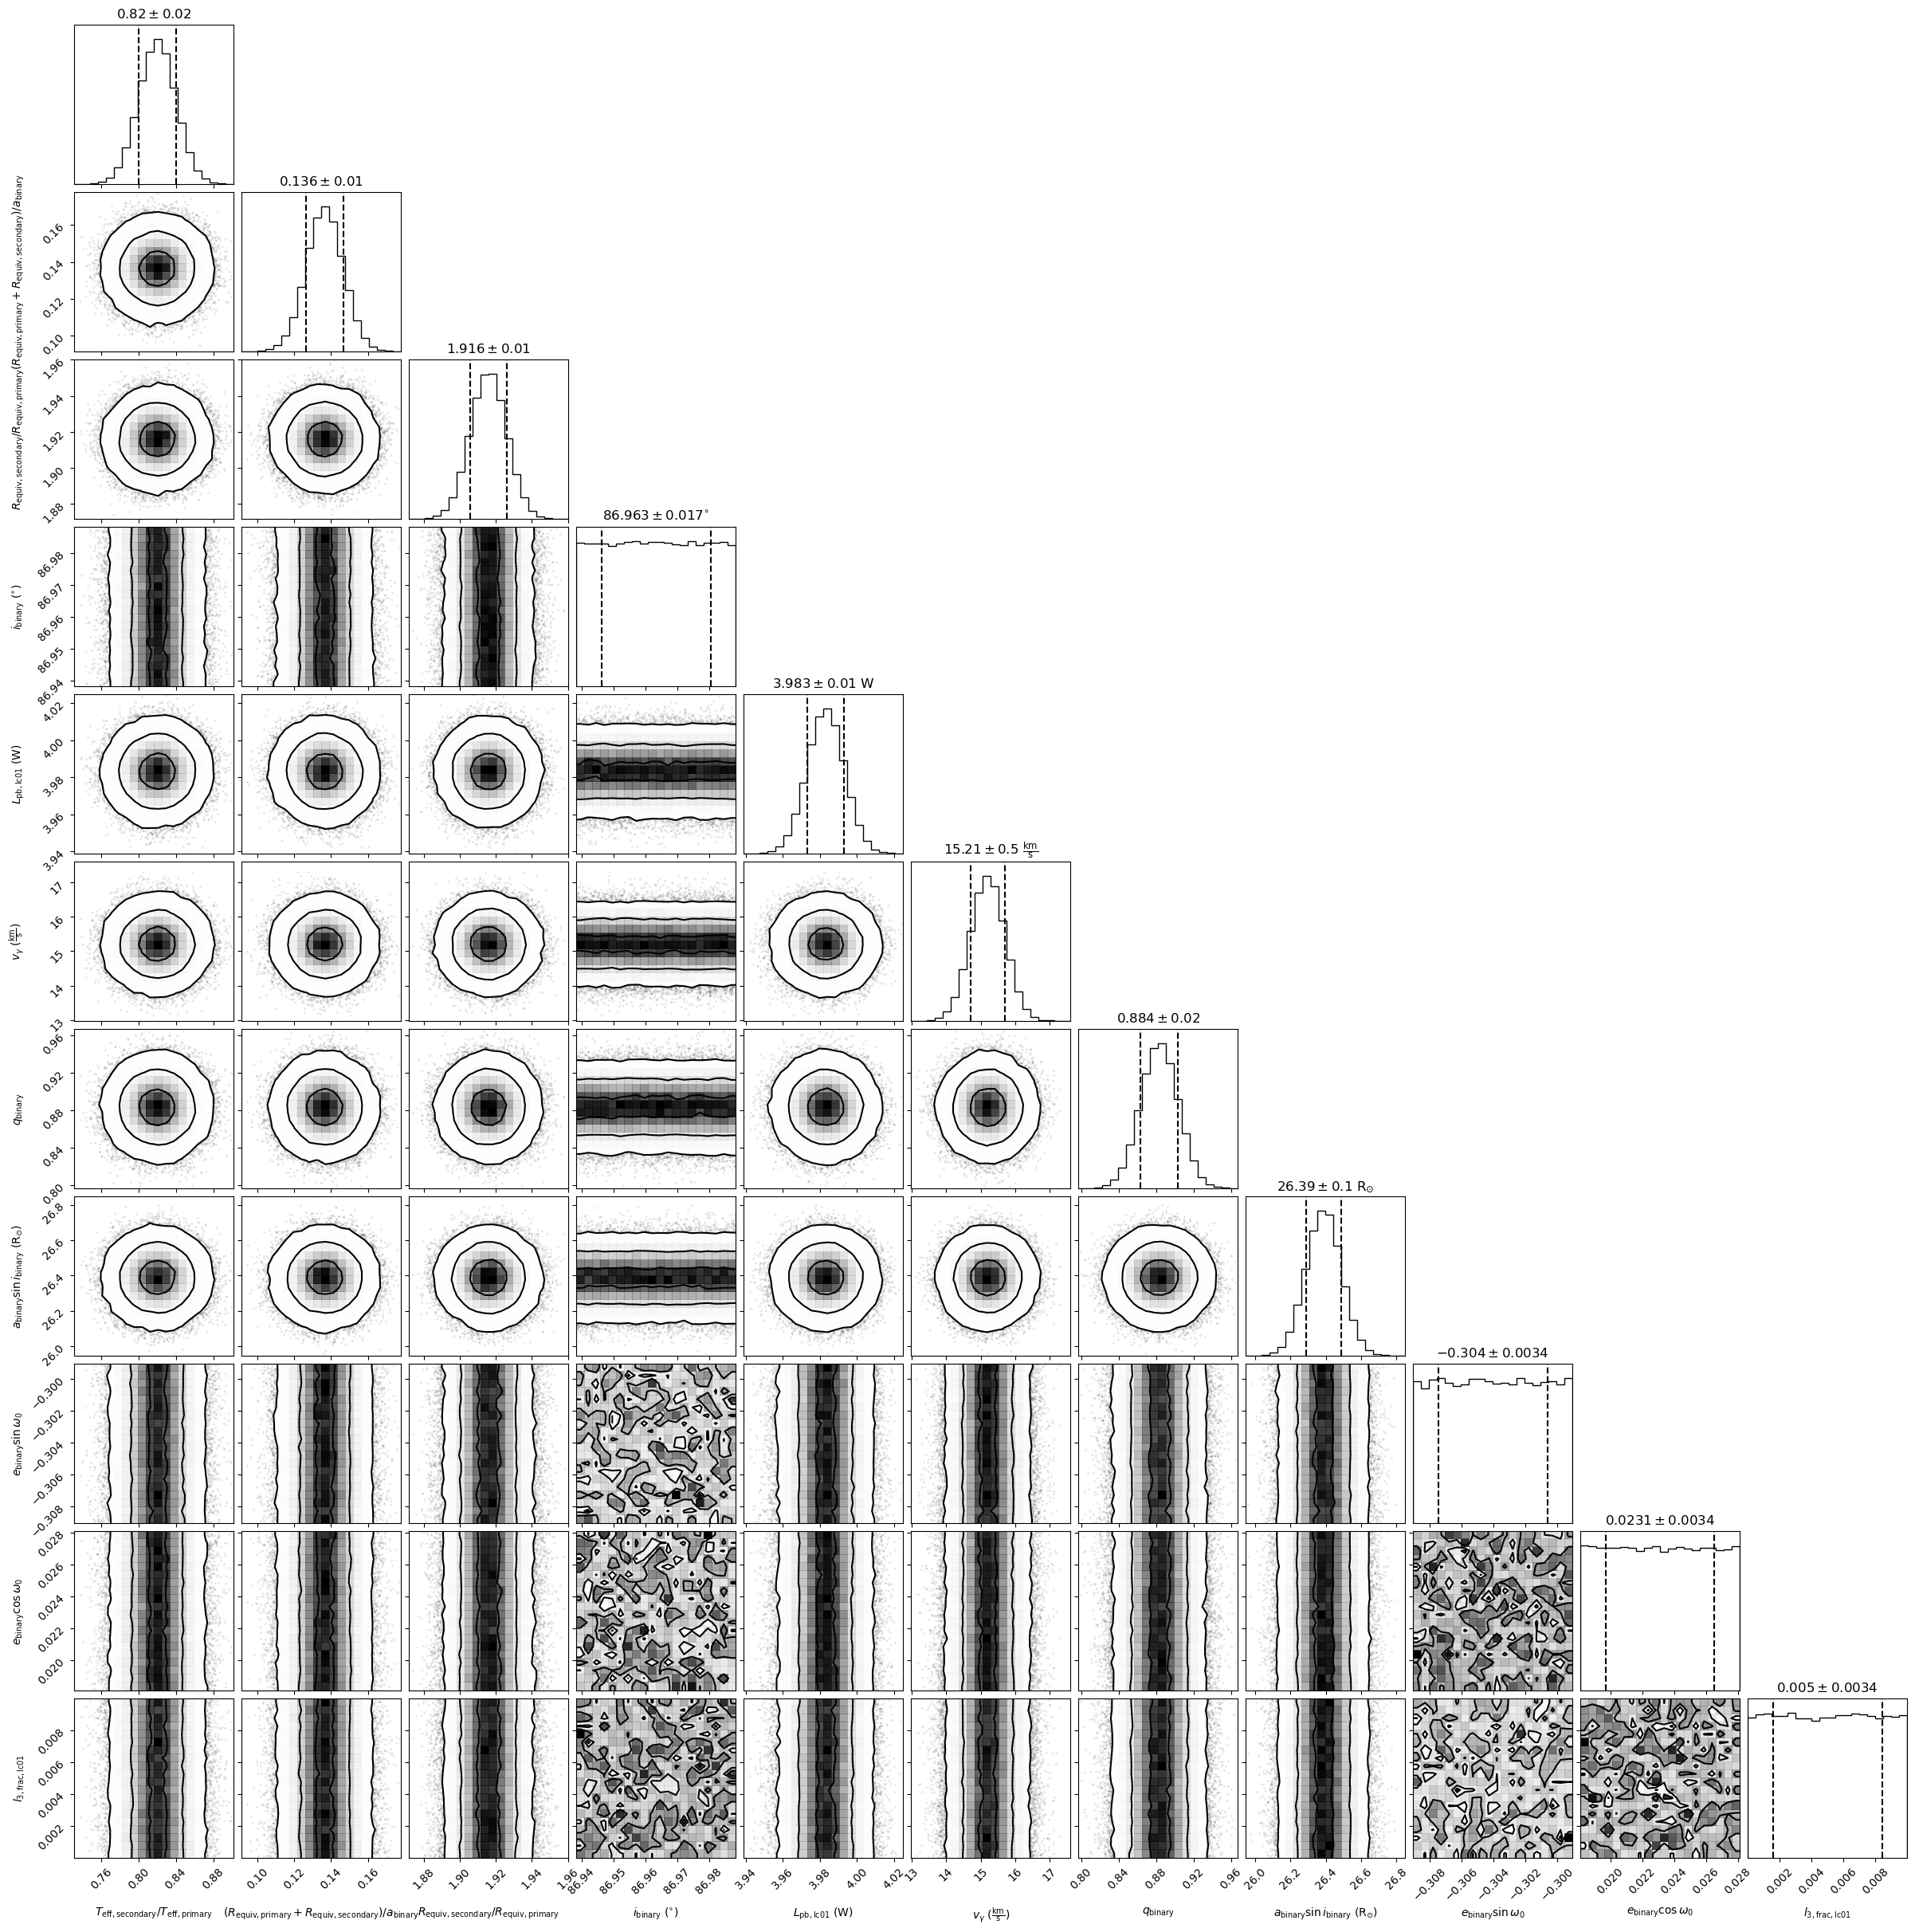

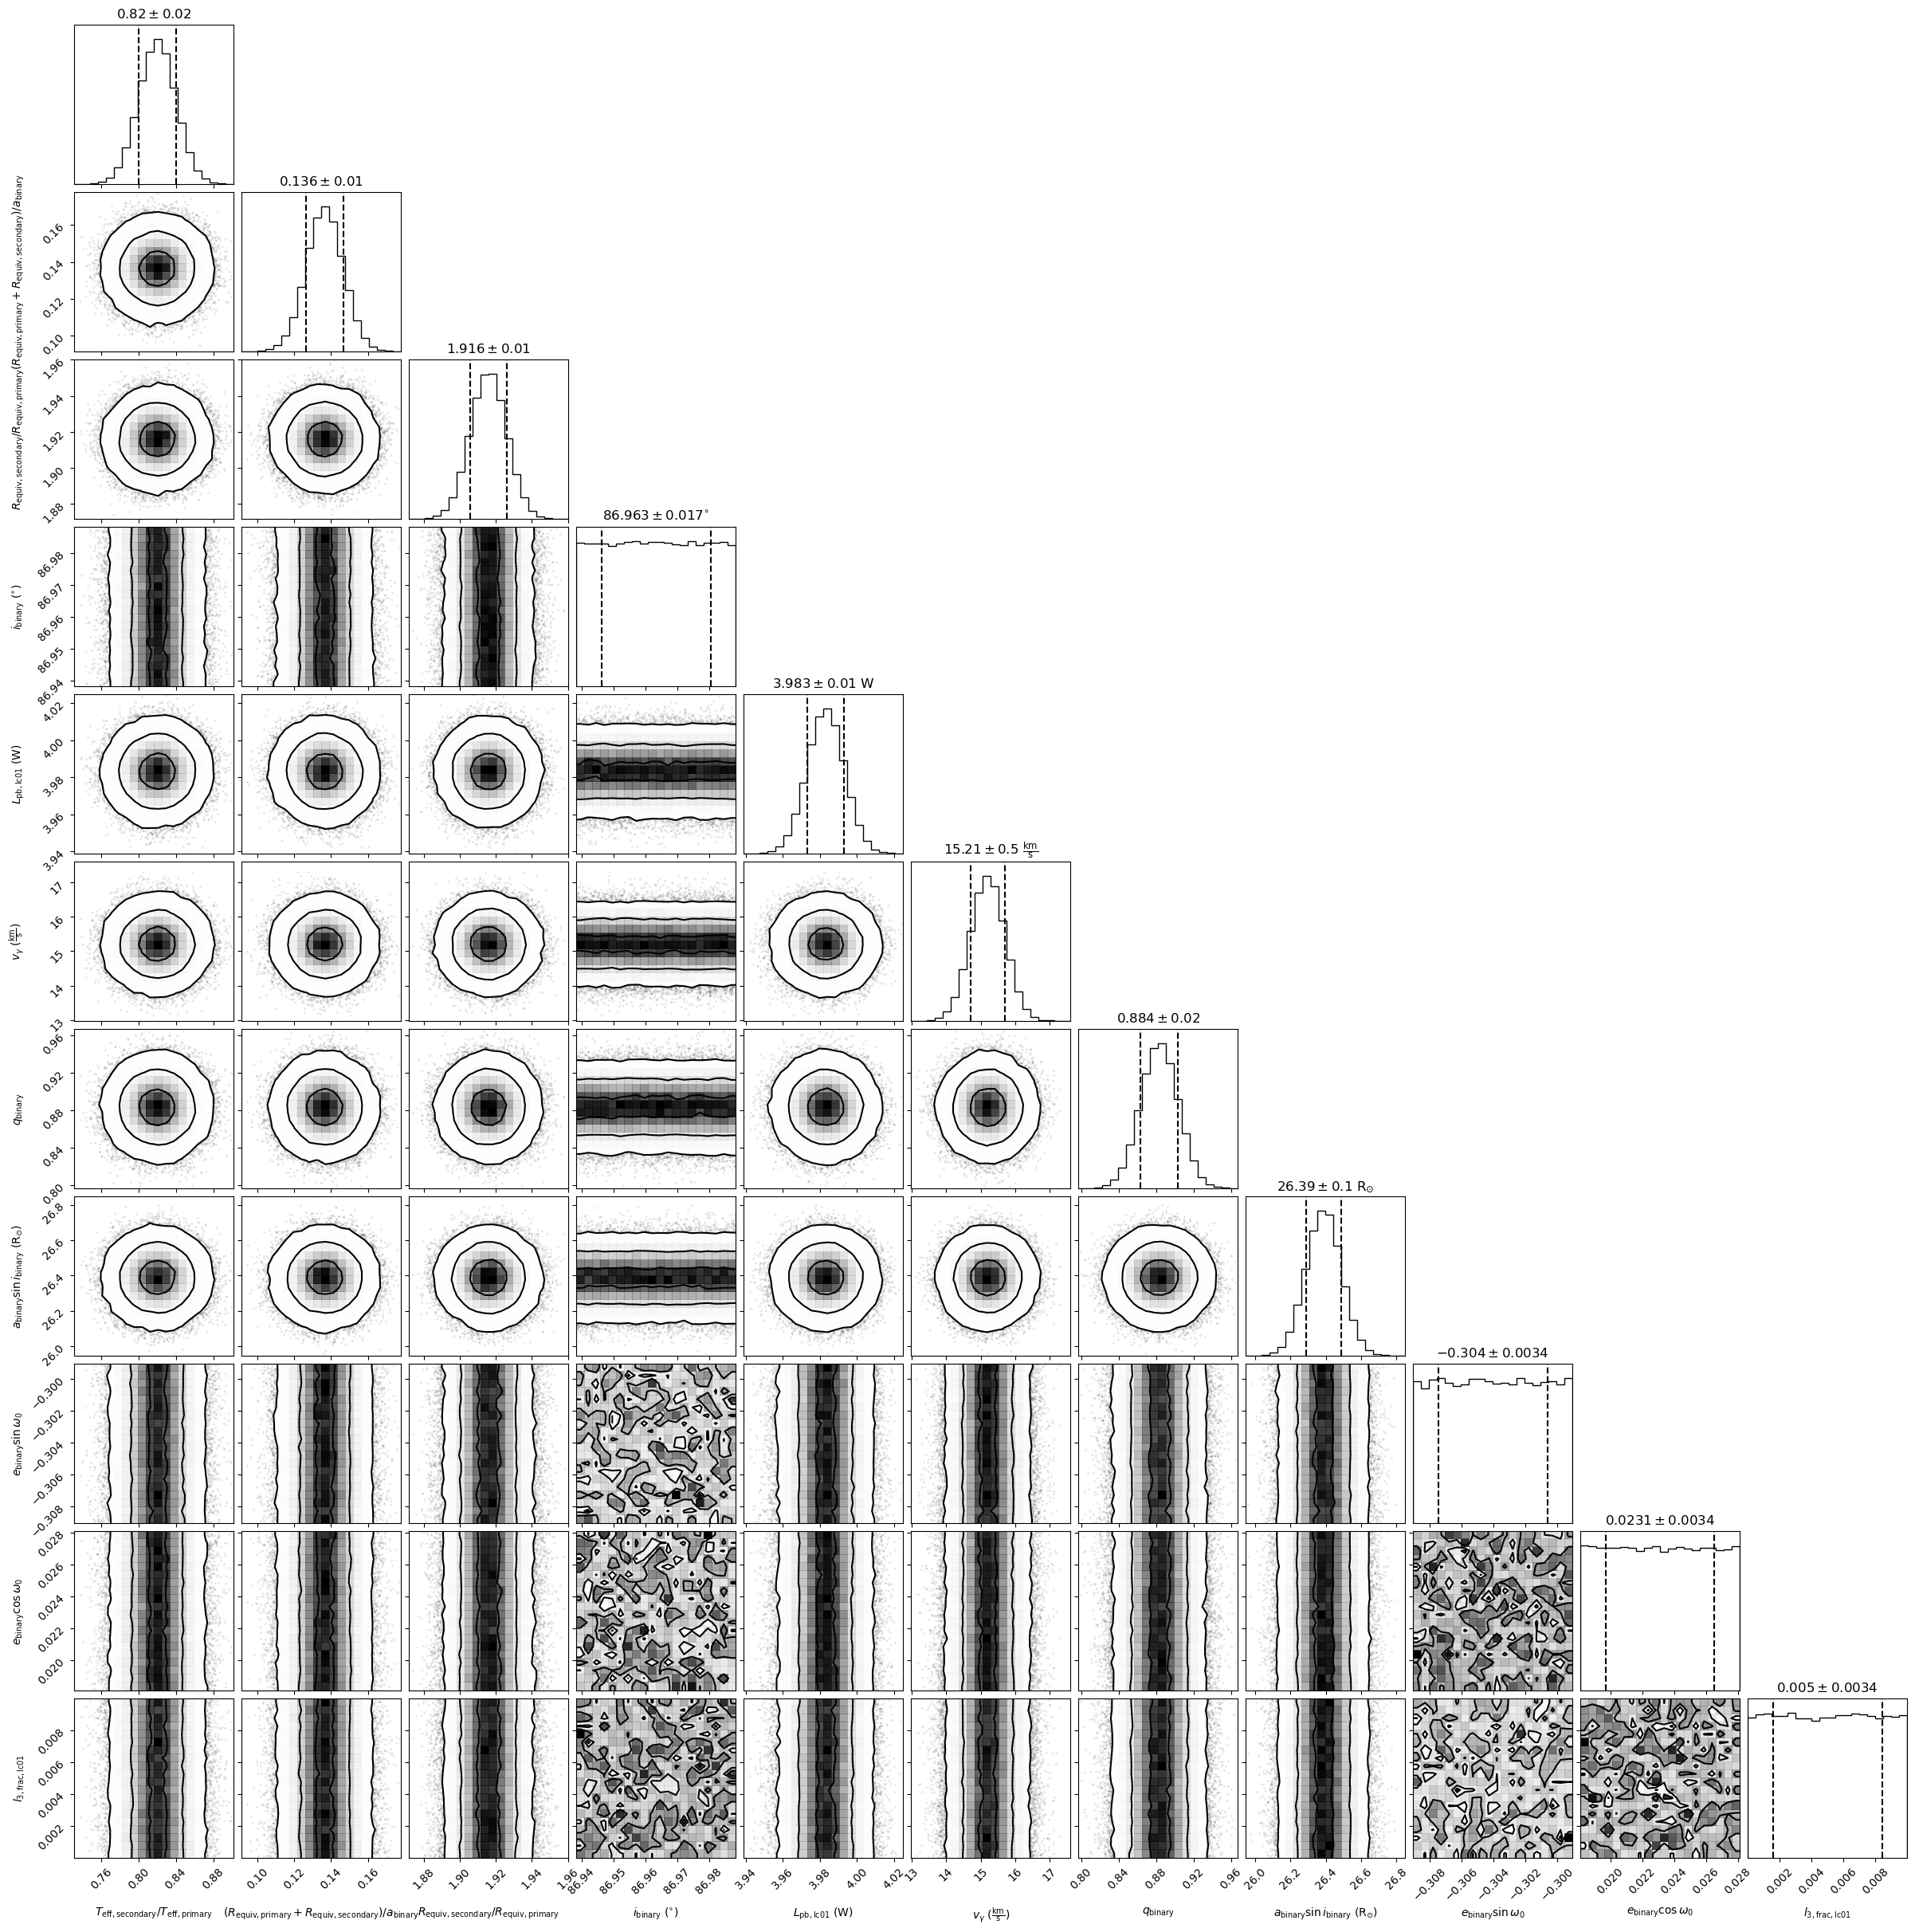

In [13]:
b.plot_distribution_collection('init_sample')

In [14]:
b.add_solver('sampler.emcee', solver = 'mcmc',
              init_from = 'init_sample',
              compute = 'physics_comp', niters = 100)

<ParameterSet: 17 parameters | qualifiers: compute, continue_from, init_from_requires, comments, nwalkers, priors, niters, burnin_factor, progress_every_niters, init_from, expose_failed, continue_from_iter, use_server, init_from_combine, priors_combine, thin_factor, nlags_factor>

In [15]:
b.set_value('nwalkers@mcmc', value = 24)

### Initial Sampling

In [16]:
b.run_solver('mcmc', solution = 'init_sampling')

  0%|          | 0/100 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.12/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 100/100 [5:28:38<00:00, 191.01s/it] /opt/anaconda3/lib/python3.12/site-packages/emcee/autocorr.py:38: RuntimeWarning: invalid value encountered in divide
  acf /= acf[0]
100%|██████████| 100/100 [5:28:38<00:00, 197.19s/it]


<ParameterSet: 20 parameters | qualifiers: burnin, niters, fitted_units, progress, wrap_central_values, nwalkers, nlags, comments, thin, adopt_distributions, autocorr_times, adopt_values, fitted_twigs, distributions_convert, samples, lnprob_cutoff, acceptance_fractions, lnprobabilities, failed_samples, adopt_parameters>

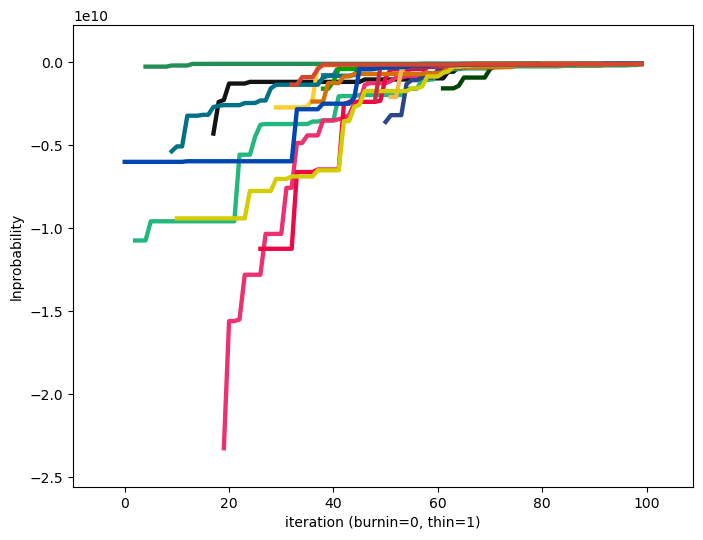

(<autofig.figure.Figure | 1 axes | 18 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [17]:
b.plot(solution = 'init_sampling', style = 'lnprobability', burnin = 0, thin = 1)

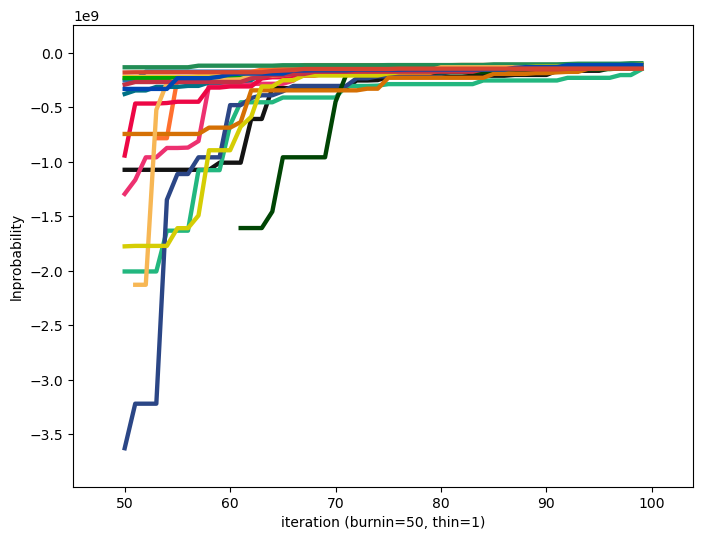

(<autofig.figure.Figure | 1 axes | 18 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [28]:
b.plot(solution = 'init_sampling', style = 'lnprobability', burnin = 50, thin = 1)

(None, <Figure size 2440x2440 with 121 Axes>)

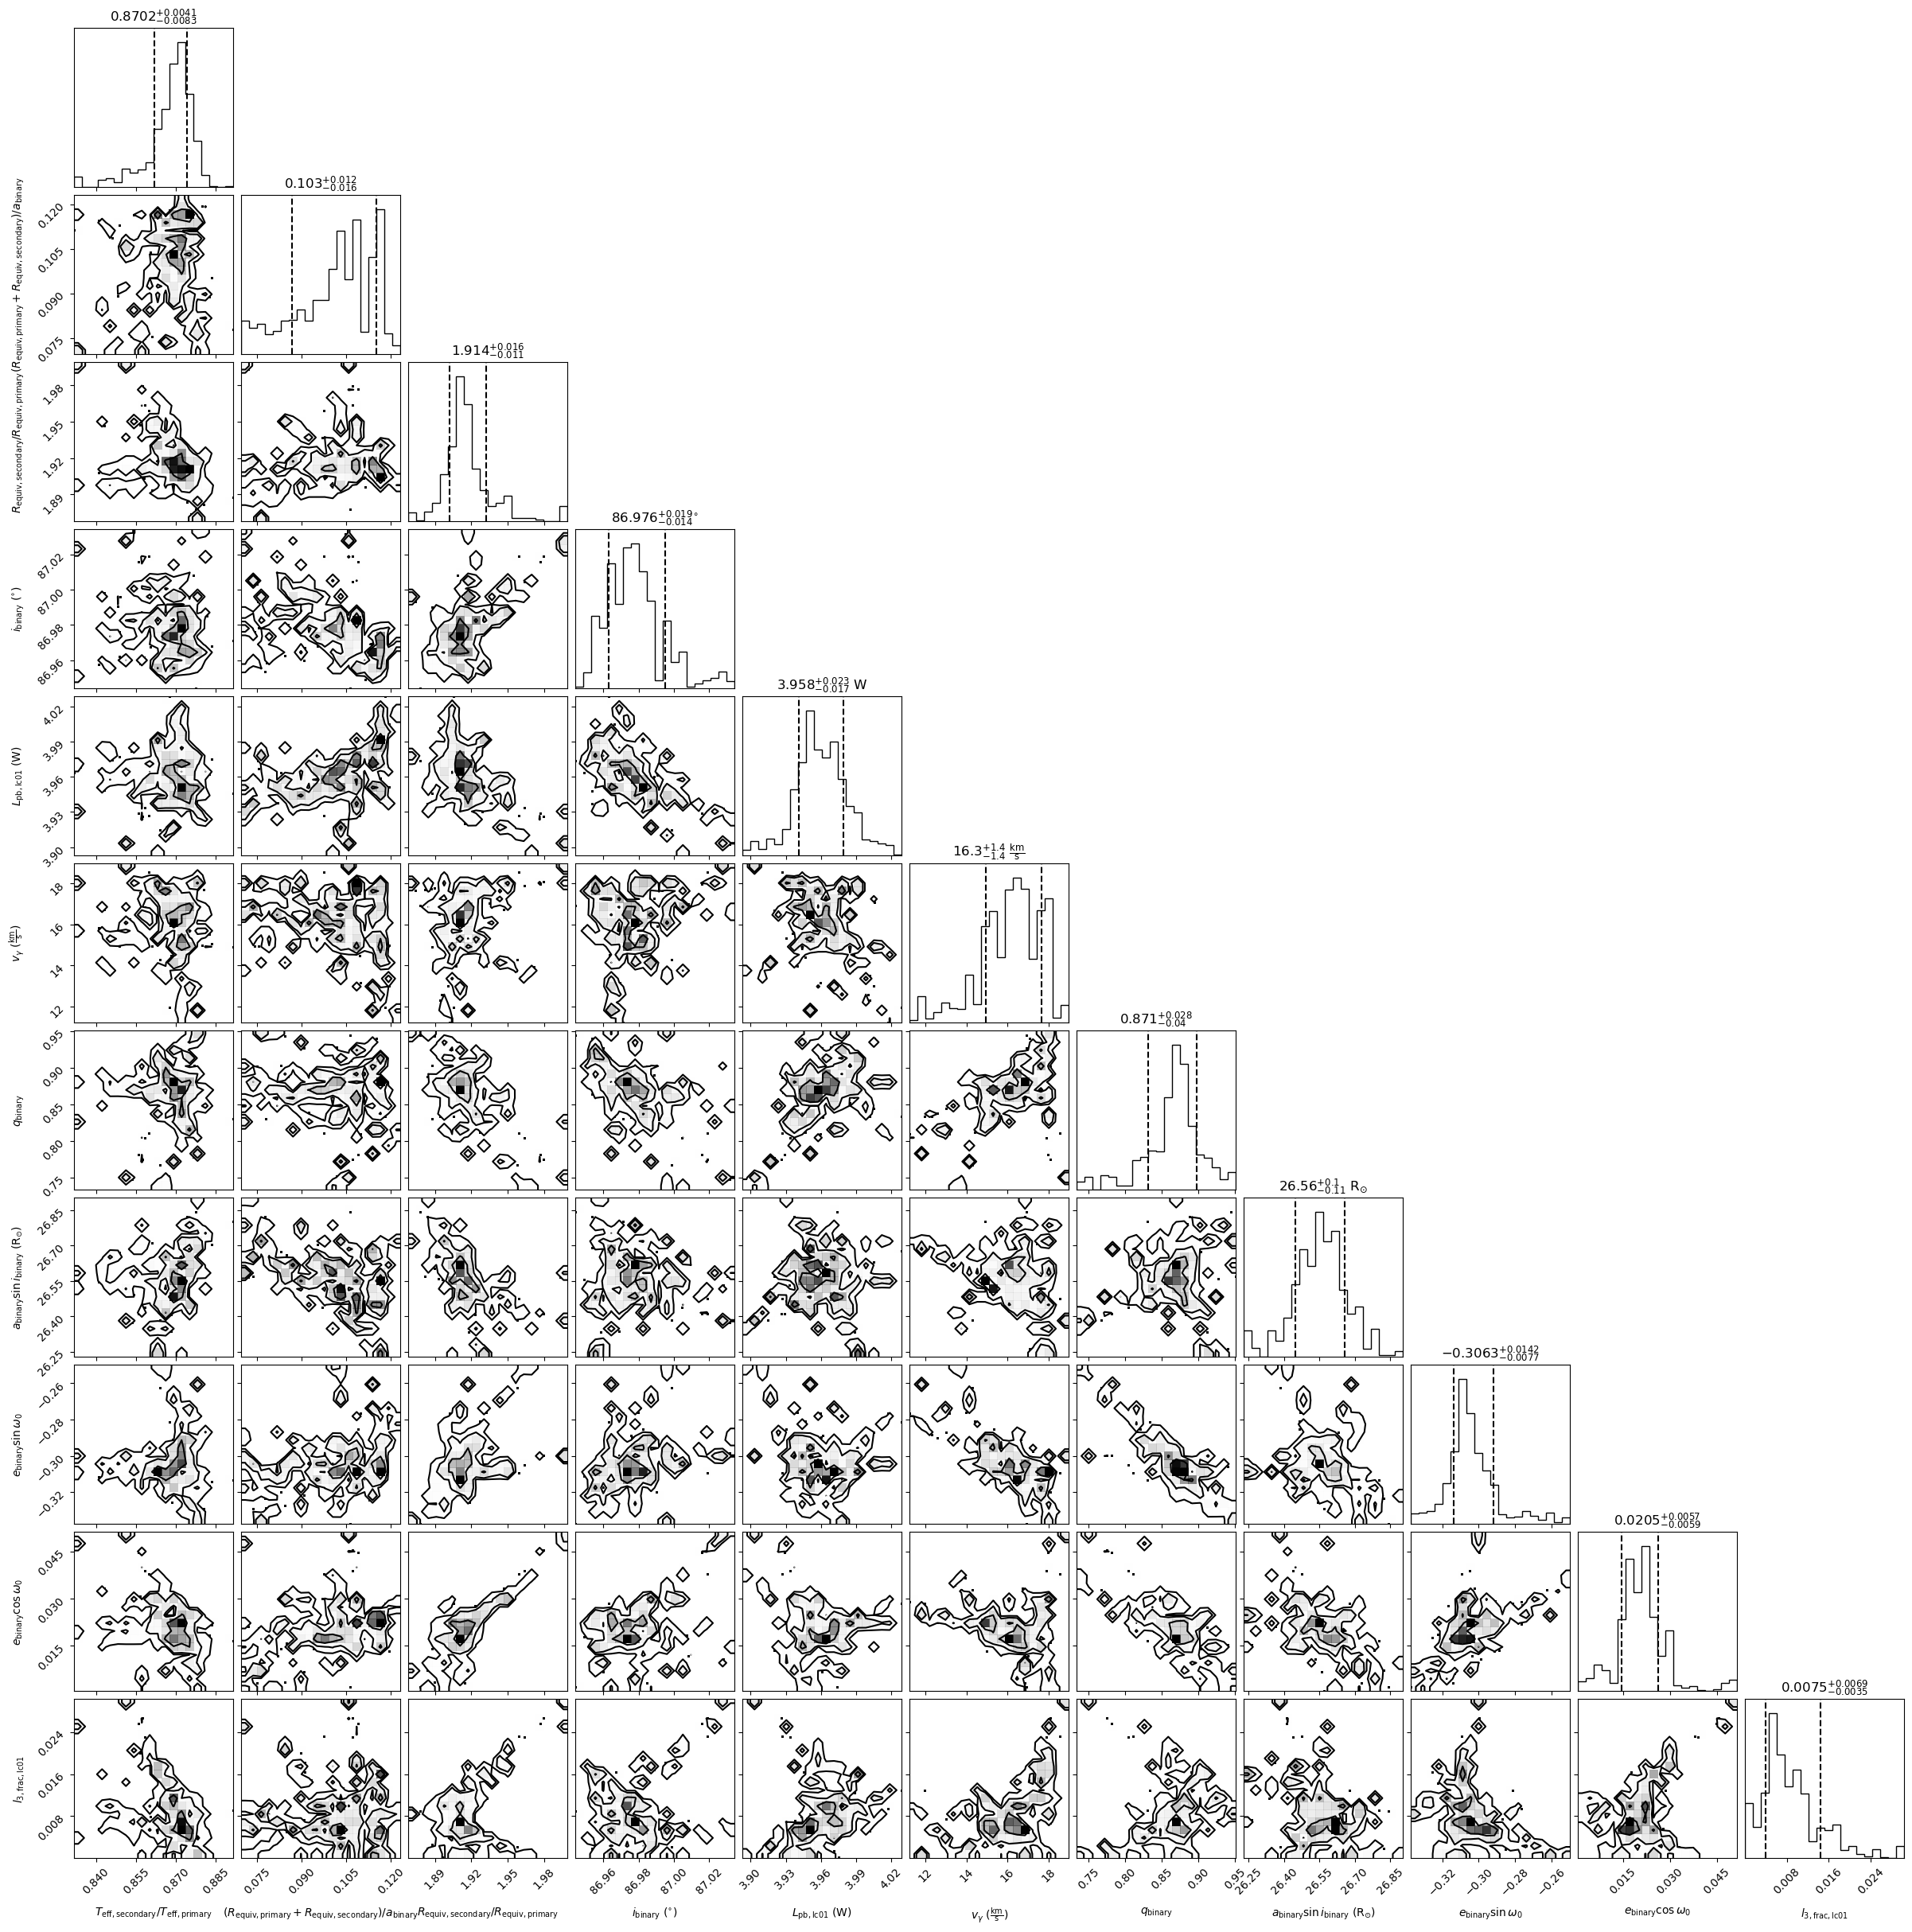

In [29]:
b.plot(solution = 'init_sampling', style = 'corner', burnin = 50, thin = 1)

(None, <Figure size 2440x2440 with 121 Axes>)

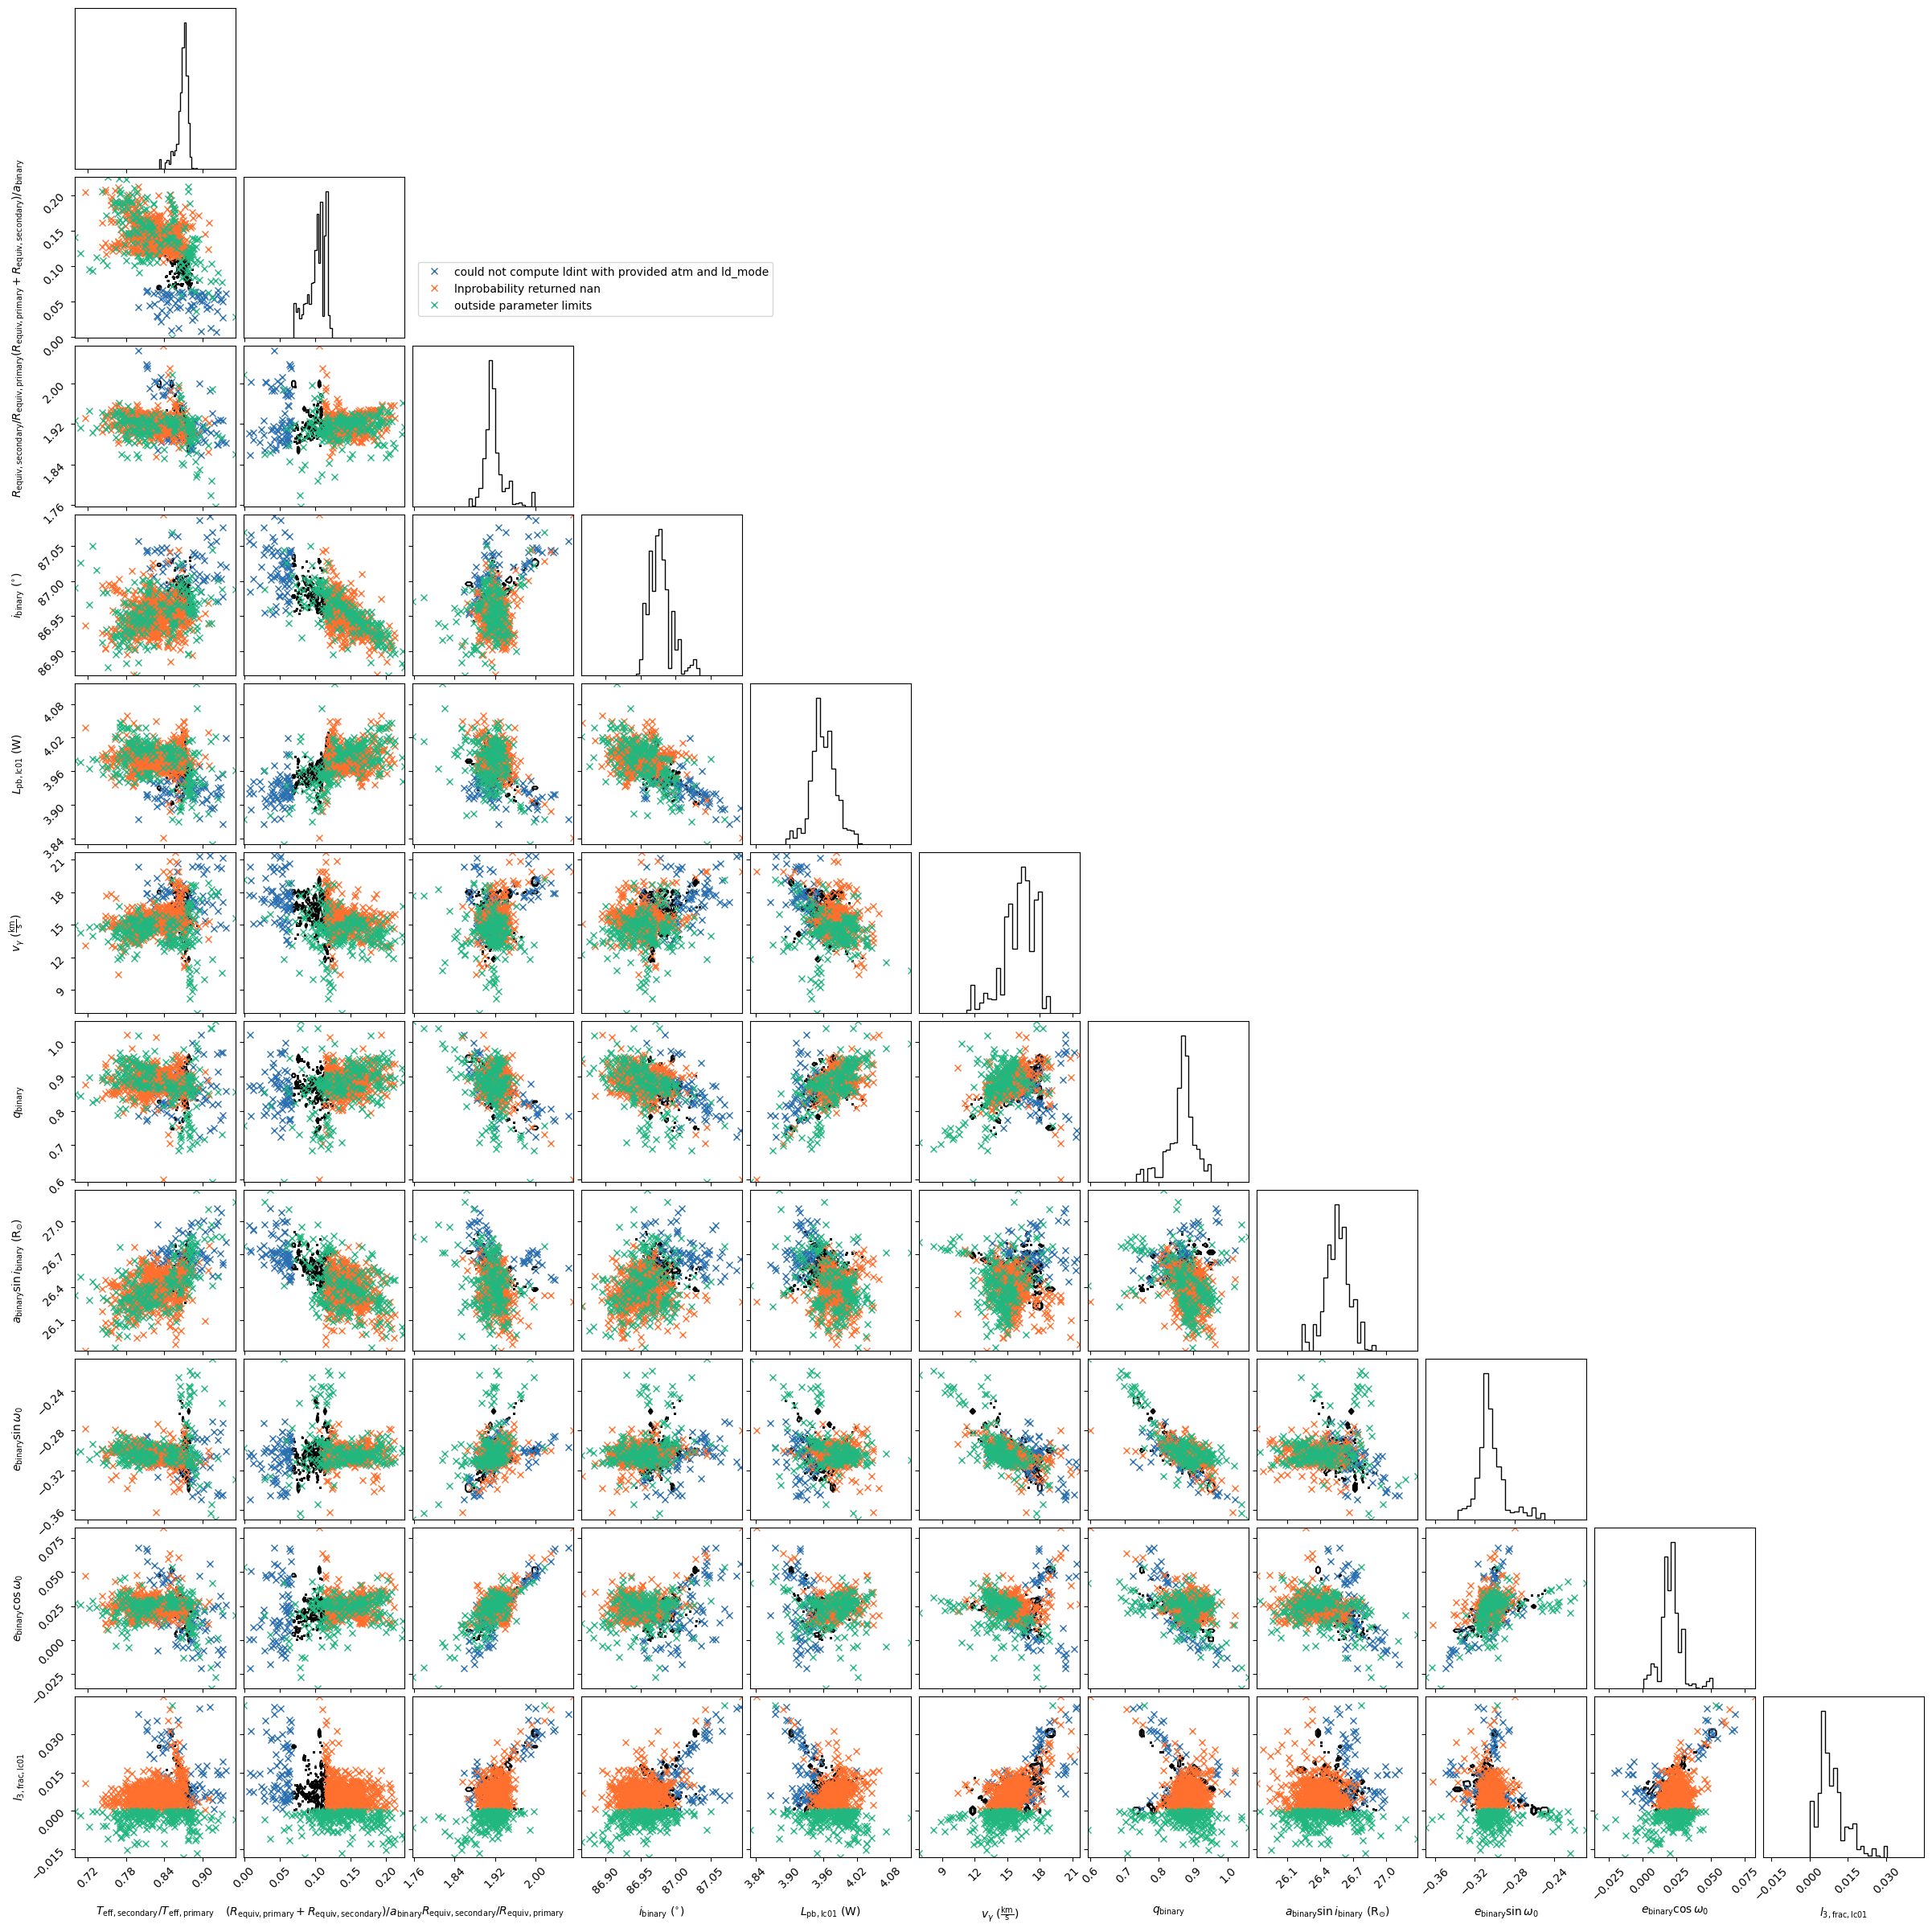

In [8]:
b.plot(solution = 'init_sampling', style = 'failed', burnin = 50)

In [9]:
b.save('after_init_sampling.bundle')

'after_init_sampling.bundle'

### Round 2

In [13]:
b = phoebe.open('/Users/karan/Documents/GitHub/Eclipsing-Binary-Modeling/bundles/after_init_sampling.bundle')

In [14]:
b['continue_from@mcmc'] = 'init_sampling'

In [15]:
b.run_solver('mcmc', solution = 'round_2')

  0%|          | 0/100 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.12/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 100/100 [5:59:02<00:00, 228.14s/it] /opt/anaconda3/lib/python3.12/site-packages/emcee/autocorr.py:38: RuntimeWarning: invalid value encountered in divide
  acf /= acf[0]
100%|██████████| 100/100 [5:59:02<00:00, 215.43s/it]


<ParameterSet: 20 parameters | qualifiers: nwalkers, fitted_units, lnprob_cutoff, fitted_twigs, progress, comments, wrap_central_values, niters, failed_samples, adopt_values, burnin, nlags, adopt_parameters, thin, distributions_convert, autocorr_times, adopt_distributions, lnprobabilities, acceptance_fractions, samples>

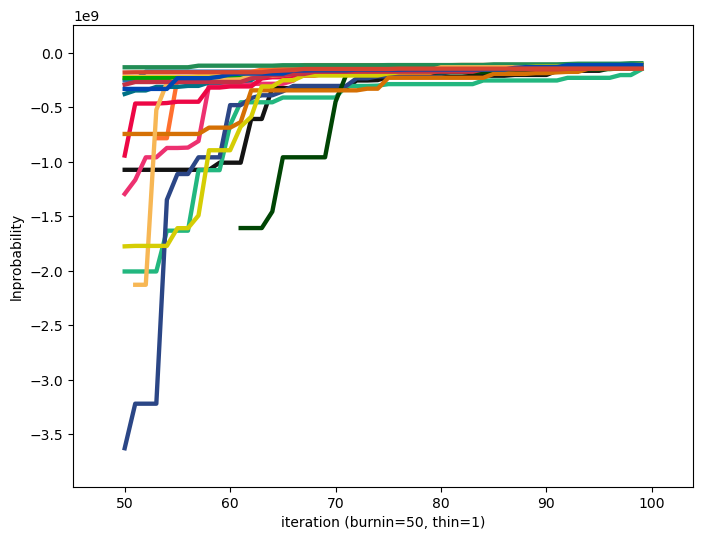

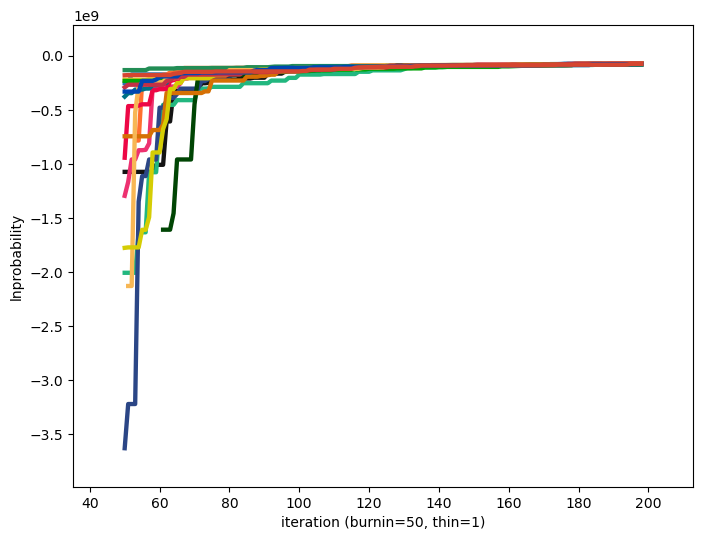

(<autofig.figure.Figure | 1 axes | 18 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [26]:
b.plot(solution = 'init_sampling', style = 'lnprobability', burnin = 50, thin = 1, show = True)
b.plot(solution = 'round_2', style = 'lnprobability', burnin = 50, thin = 1, show = True)

In [4]:
b['continue_from@mcmc'] = 'round_2'

In [5]:
b.run_solver('mcmc', solution = 'round_2', overwrite = True)

  0%|          | 0/100 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.12/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 100/100 [6:12:15<00:00, 226.09s/it] /opt/anaconda3/lib/python3.12/site-packages/emcee/autocorr.py:38: RuntimeWarning: invalid value encountered in divide
  acf /= acf[0]
100%|██████████| 100/100 [6:12:15<00:00, 223.36s/it]


<ParameterSet: 20 parameters | qualifiers: adopt_distributions, niters, fitted_twigs, lnprob_cutoff, acceptance_fractions, distributions_convert, adopt_parameters, samples, fitted_units, comments, burnin, nlags, progress, thin, lnprobabilities, nwalkers, wrap_central_values, failed_samples, autocorr_times, adopt_values>

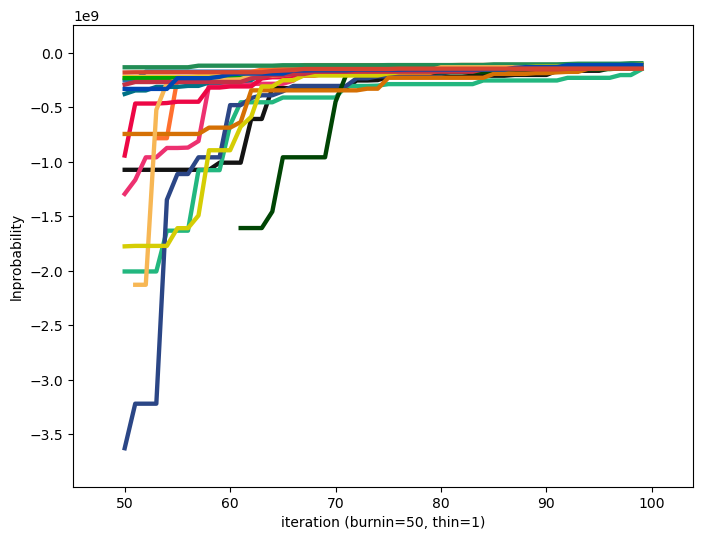

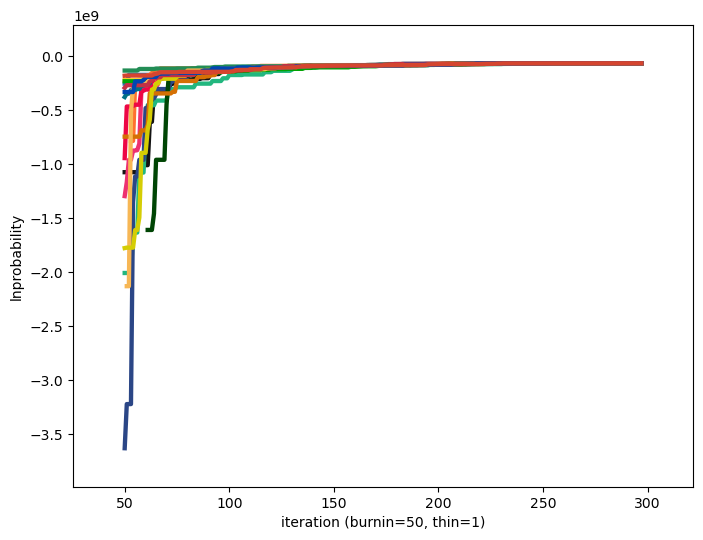

(<autofig.figure.Figure | 1 axes | 18 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [6]:
b.plot(solution = 'init_sampling', style = 'lnprobability', burnin = 50, thin = 1, show = True)
b.plot(solution = 'round_2', style = 'lnprobability', burnin = 50, thin = 1, show = True)

In [3]:
b['continue_from@mcmc'] = 'round_2'

In [4]:
b.run_solver('mcmc', solution = 'round_2', overwrite = True)

  0%|          | 0/100 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.12/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 100/100 [6:00:10<00:00, 219.87s/it] /opt/anaconda3/lib/python3.12/site-packages/emcee/autocorr.py:38: RuntimeWarning: invalid value encountered in divide
  acf /= acf[0]
100%|██████████| 100/100 [6:00:10<00:00, 216.10s/it]


<ParameterSet: 20 parameters | qualifiers: distributions_convert, lnprob_cutoff, fitted_twigs, adopt_distributions, nwalkers, wrap_central_values, adopt_parameters, acceptance_fractions, thin, niters, nlags, comments, lnprobabilities, burnin, adopt_values, autocorr_times, fitted_units, progress, failed_samples, samples>

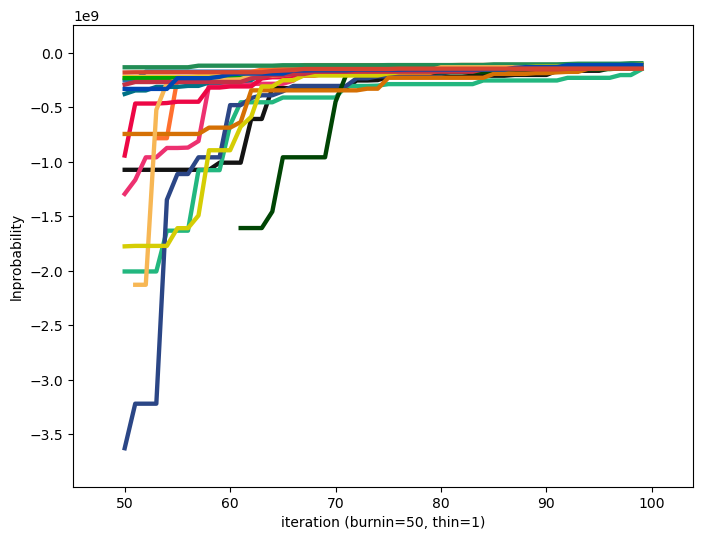

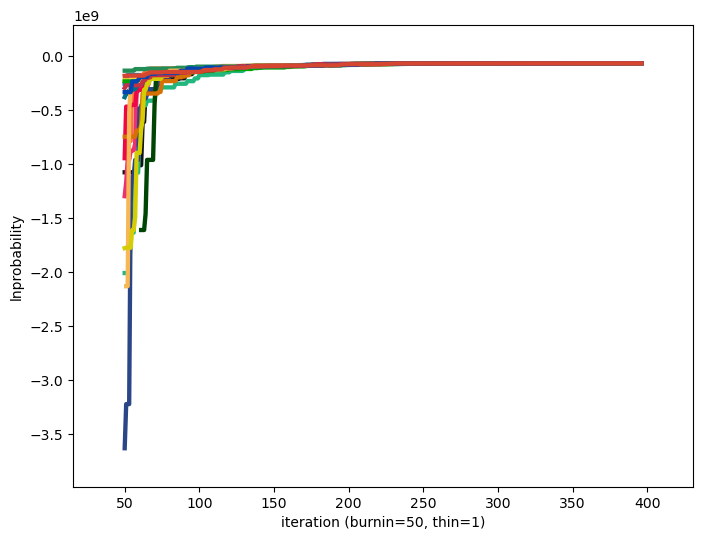

(<autofig.figure.Figure | 1 axes | 18 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [5]:
b.plot(solution = 'init_sampling', style = 'lnprobability', burnin = 50, thin = 1, show = True)
b.plot(solution = 'round_2', style = 'lnprobability', burnin = 50, thin = 1, show = True)

In [3]:
b['continue_from@mcmc'] = 'round_2'

In [4]:
b.run_solver('mcmc', solution = 'round_2', overwrite = True)

  0%|          | 0/100 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.12/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 100/100 [6:19:53<00:00, 242.26s/it] Tue, 13 Aug 2024 23:49 emcee.autocorr WARNING The chain is shorter than 50 times the integrated autocorrelation time for 11 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 10;
tau: [35.31134191 56.50062257 64.8994105  60.99011593 65.19155977 65.10856635
 31.97977867 65.18587222 65.29780046 33.56004962 63.19048336]
100%|██████████| 100/100 [6:19:53<00:00, 227.93s/it]


<ParameterSet: 20 parameters | qualifiers: fitted_units, adopt_distributions, failed_samples, comments, autocorr_times, nlags, acceptance_fractions, samples, niters, fitted_twigs, nwalkers, wrap_central_values, distributions_convert, progress, lnprob_cutoff, thin, adopt_parameters, burnin, lnprobabilities, adopt_values>

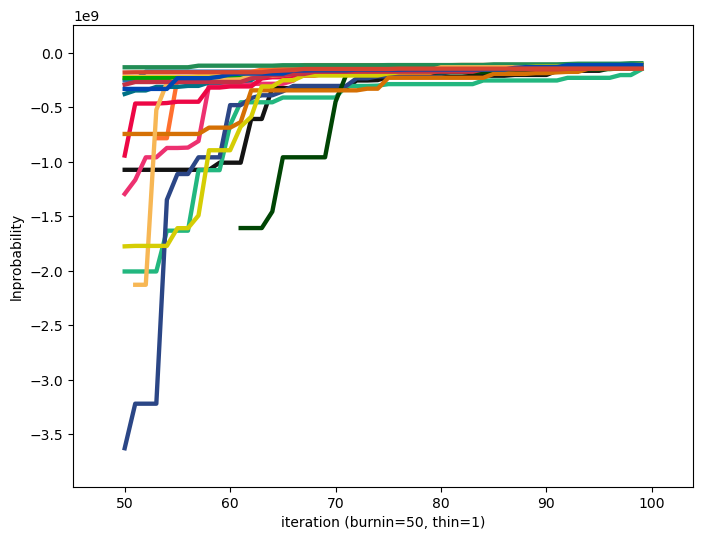

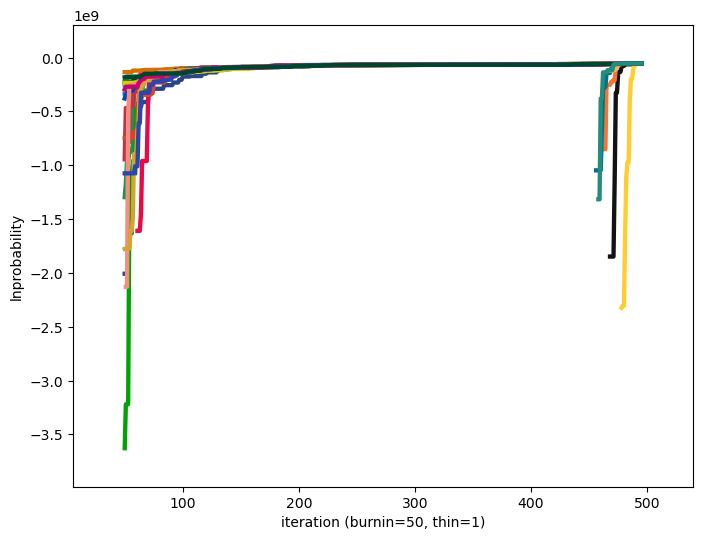

(<autofig.figure.Figure | 1 axes | 24 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [5]:
b.plot(solution = 'init_sampling', style = 'lnprobability', burnin = 50, thin = 1, show = True)
b.plot(solution = 'round_2', style = 'lnprobability', burnin = 50, thin = 1, show = True)

In [11]:
print('burnin iterations for init_sampling is: %d' % 
      (int(max(b['value@autocorr_times@init_sampling']) * b['value@burnin_factor@mcmc'])))

print('burnin iterations for round_2 is: %d' % 
      (int(max(b['value@autocorr_times@round_2']) * b['value@burnin_factor@mcmc'])))

burnin iterations for init_sampling is: 2
burnin iterations for round_2 is: 130


(None, <Figure size 2440x2440 with 121 Axes>)

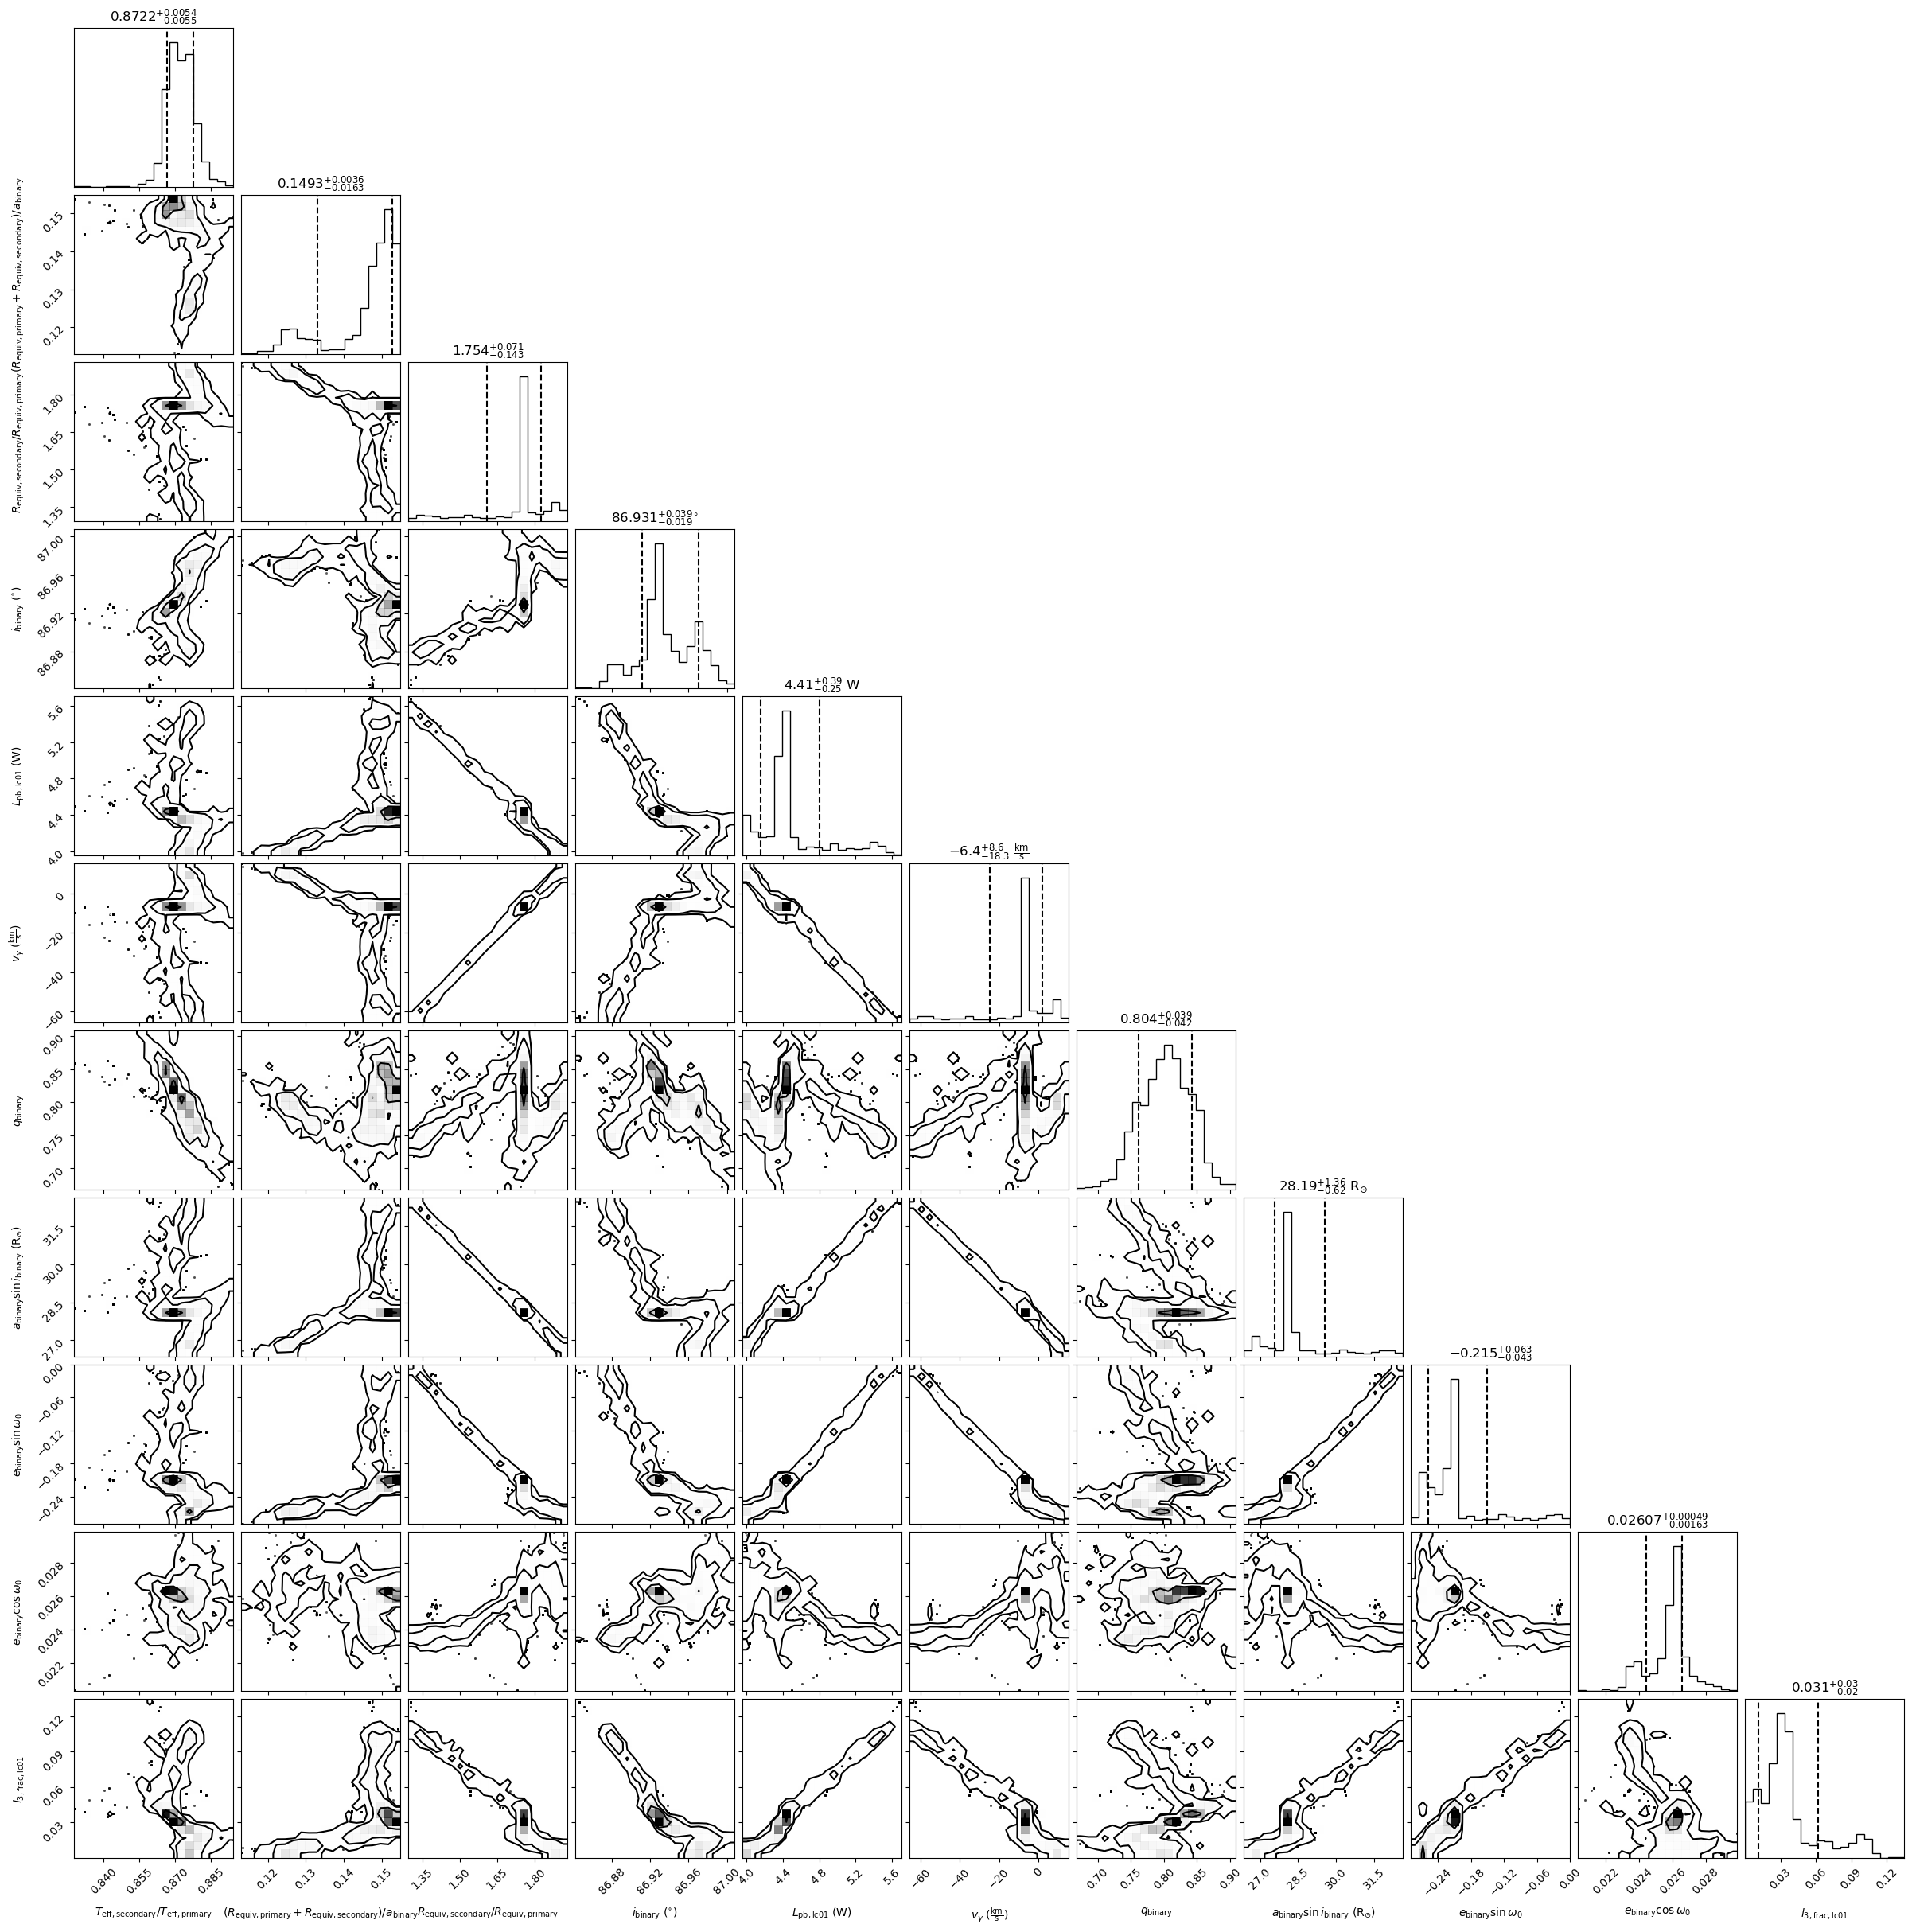

In [9]:
b.plot(solution = 'round_2', style = 'corner', burnin = 130, thin = 1, show = True)

In [12]:
b.save('round_2.bundle')

'round_2.bundle'